# Cardiovascular Diseases Prediction

According to statistics by Singapore Heart Foundation, almost 1 in 3 deaths is due to heart disease or stroke. Cardiovascular diseases are also the top disease burden in Singapore, responsible for almost 20% of the total disease and injury burden.

What are cardiovascular diseases?
Cardiovascular diseases (CVDs) are a group of disorders of the heart and blood vessels. They include:
- Coronary heart disease – a disease of the blood vessels supplying the heart muscle;
- Cerebrovascular disease – a disease of the blood vessels supplying the brain;
- Peripheral arterial disease – a disease of blood vessels supplying the arms and legs;
- Rheumatic heart disease – damage to the heart muscle and heart valves from rheumatic fever, caused by streptococcal bacteria;
- Congenital heart disease – birth defects that affect the normal development and functioning of the heart caused by malformations of the heart structure from birth; and
- Deep vein thrombosis and pulmonary embolism – blood clots in the leg veins, which can dislodge and move to the heart and lungs.

The Cardiovascular Diseases Dataset on Kaggle will be used for the classification of the persence or absence of CVDs. 


# The Cardiovascular Diseases Dataset

Data description:
- Objective: Factual information
- Examination: Results of medical examination
-  Subjective: Information given by the patient

Features:
- age : Age | Objective Feature | age | int (days) |
- gender : Gender | Objective Feature | gender | 1: women, 2: men |
- height : Height | Objective Feature | height | int (cm) |
- weight : Weight | Objective Feature | weight | float (kg) |
- ap_hi : Systolic blood pressure | Examination Feature | ap_hi | int |
- ap_lo : Diastolic blood pressure | Examination Feature | ap_lo | int |
- cholesterol : Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
- gluc : Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
- smoke : Smoking | Subjective Feature | smoke | binary |
- alco : Alcohol intake | Subjective Feature | alco | binary |
- active : Physical activity | Subjective Feature | active | binary |
- cardio : Presence or absence of cardiovascular disease | Target Variable | cardio | binary |

## 1. Import libraries required

Importing essential libriaries 

In [2]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
import os
import pandas_profiling as pp 
sb.set() # set the default Seaborn style for graphics
sb.set_style("darkgrid")
sb.set_context("poster", font_scale = .5, rc={"grid.linewidth": 0.6})


## 2. Checking of Data 

Read the data .csv file and put it in a dataframe

In [3]:
# Import the data
cardio = pd.read_csv('cardio_train.csv', sep=';')

# Take a look at first 10 data points from the dataset 
cardio.head(10)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
5,8,21914,1,151,67.0,120,80,2,2,0,0,0,0
6,9,22113,1,157,93.0,130,80,3,1,0,0,1,0
7,12,22584,2,178,95.0,130,90,3,3,0,0,1,1
8,13,17668,1,158,71.0,110,70,1,1,0,0,1,0
9,14,19834,1,164,68.0,110,60,1,1,0,0,0,0


This shows the data type and the number of datapoints in the raw data. There are 70,000 datasets which is a good range for this Machine Learning project.

In [4]:
print("Data type : ", type(cardio))
print("Data dims : ", cardio.shape)

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  (70000, 13)


The info() method displays information about a DataFrame including the index data type, coloumns, non zero values and memory usage.
There are no missing values in this dataset, there is no need for handling data loss.

In [5]:
# Basic information about the dataset
cardio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [6]:
cardio.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


## 3. Processing Data 

By making a copy of the dataset test could test out if our process is helpful for training model. 

In [7]:
cardio_data = cardio.copy()

The 'id' coloumn is not a useful attribution which we can use in our Machine Learning model. Thus, it is removed. 


The raw data gave age in terms of days, we converted it to years.

We also did a combination of height and weight into Body Mass Index (BMI). 
Note: BMI is a crucial factor given one's height and weight. It measures an individual's body fatness and helps to screen for weight categories that may lead to health problems. 

In [8]:
# Drop id column as it doesnt help 
cardio_data = cardio_data.drop(columns='id')

# Convert age into years taking into account of 29 days of February in every 4 years
cardio_data['age'] = cardio_data['age']//365.25

# Combine height & weight into BMI
cardio_data['bmi'] = cardio_data["weight"] / (cardio_data["height"]/100)**2
cardio_data = cardio_data.drop(columns=['weight', 'height'])

In [9]:
# The values after the conversion
cardio_data.head(10)

,age,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,50.0,2,110,80,1,1,0,0,1,0,21.967120
1,55.0,1,140,90,3,1,0,0,1,1,34.927679
2,51.0,1,130,70,3,1,0,0,0,1,23.507805
3,48.0,2,150,100,1,1,0,0,1,1,28.710479
4,47.0,1,100,60,1,1,0,0,0,0,23.011177
5,59.0,1,120,80,2,2,0,0,0,0,29.384676
6,60.0,1,130,80,3,1,0,0,1,0,37.729725
7,61.0,2,130,90,3,3,0,0,1,1,29.983588
8,48.0,1,110,70,1,1,0,0,1,0,28.440955
9,54.0,1,110,60,1,1,0,0,0,0,25.282570


In [10]:
# Summary of the statistics
cardio_data.describe()

,age,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,52.803257,1.349571,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700,27.556513
std,6.762462,0.476838,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003,6.091511
min,29.000000,1.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.471784
25%,48.000000,1.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,23.875115
50%,53.000000,1.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,26.374068
75%,58.000000,2.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,30.222222
max,64.000000,2.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,298.666667


There are 5 numerical attributes which is age, height, weight, ap_hi, ap_lo and 6 categorical attributes which is gender, cholesterol, gluc, smoke, alco, active. 

However, the pandas .info() method interpreted all attributes as numerical type.
Therefore, we have to convert each of these categorical variables into “category” data type.

In [11]:
# Convert categorical variables into “category” data type
cat_attribs = ['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio']

# Create a list that contains numerical attributes
num_attribs = ['age', 'bmi', 'ap_hi', 'ap_lo']

# Covert the data type of categorical attributes into "category"
for cat_attrib in cat_attribs:                                # iterate over each categorical attribute
  cardio_data[cat_attrib] = cardio_data[cat_attrib].astype('category')  # convert data type

cardio_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,70000.0,52.803257,6.762462,29.000000,48.000000,53.000000,58.000000,64.000000
ap_hi,70000.0,128.817286,154.011419,-150.000000,120.000000,120.000000,140.000000,16020.000000
ap_lo,70000.0,96.630414,188.472530,-70.000000,80.000000,80.000000,90.000000,11000.000000
bmi,70000.0,27.556513,6.091511,3.471784,23.875115,26.374068,30.222222,298.666667


Our team used Pandas Profiling as our new approach for this project.
It allows us to have a very detailed report on the pandas dataframe.

*INSTALL PANDAS_PROFILING ON COMPUTER BEFORE USING THIS TECHNIQUE

1 command to get a full overview of the data set. Enables us to find any possible warnings that will affect our results. 

In [39]:
pp.ProfileReport(cardio_data, minimal=True).to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

# The Blood Pressure Feature

'ap_hi' -  Systolic blood pressure: Measure of pressure when the heart is beating 

'ap_low'- Diastolic blood pressure: Measure of pressure in between heartbeats, when the heart is at rest

From the previous table we could see that there are unrealistic values:
lowest ap_hi = -150 
lowest ap_low = -70 
highest ap_hi = 16020 
highest ap_lo = 11000

From our research, Systolic blood pressure (ap_hi) is bounded between 90 and 220mmHg while diastolic pressure (ap_low) is bounded between 60 to 120mmHg.

Therefor, we will have to remove the outliers that are outside the range.


The number of training examples have ap_hi and ap_lo outside the range of 40-200mmHg


C:\Users\User\AppData\Local\Temp\ipykernel_29976\2480660635.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cardio_data = cardio_data[~filter_min]


<AxesSubplot:xlabel='ap_hi', ylabel='Count'>

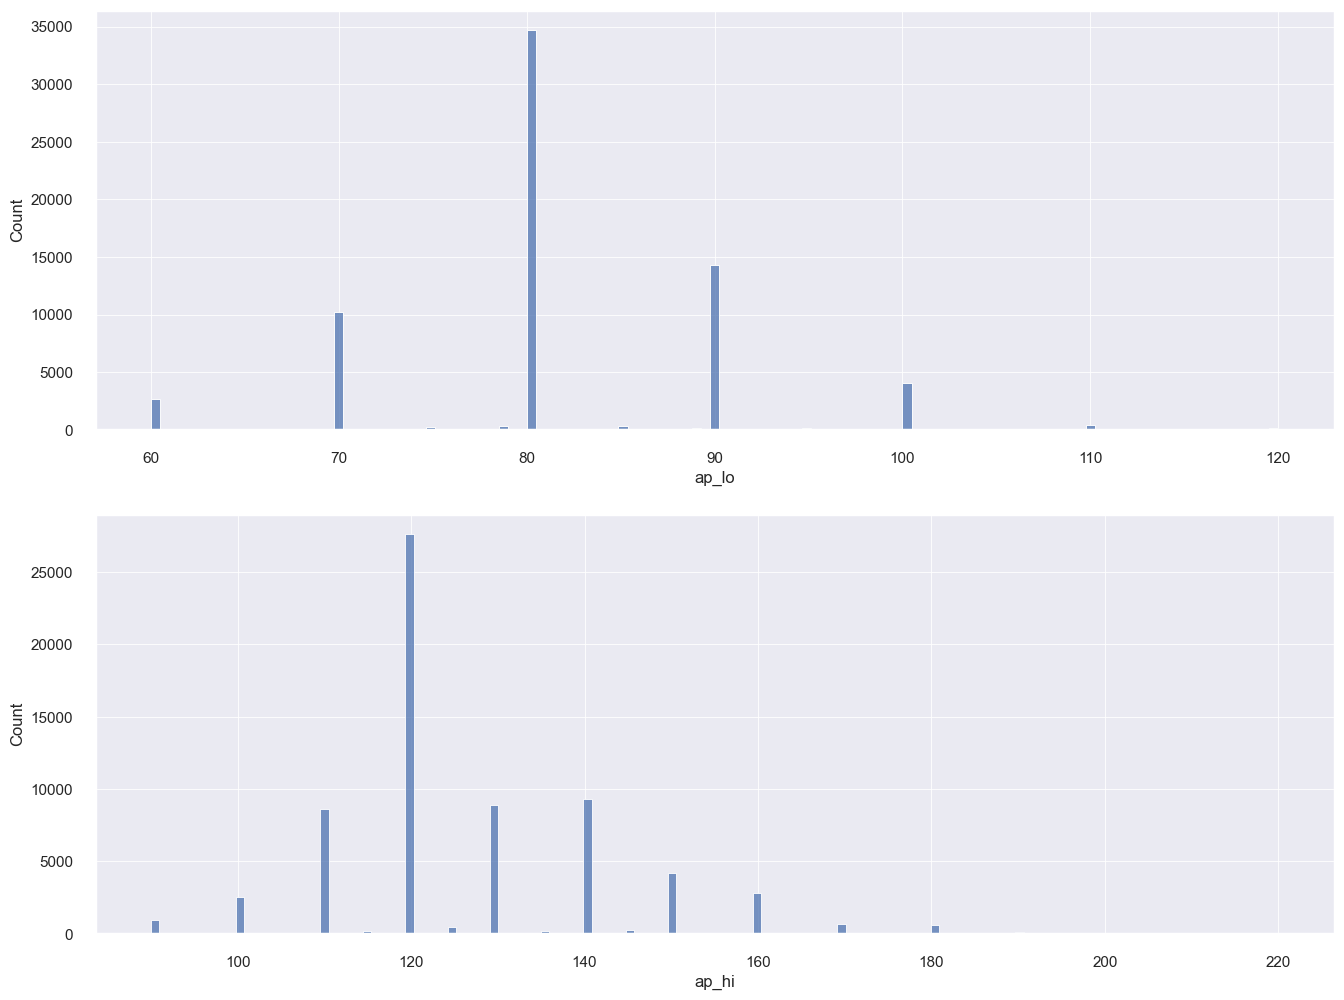

In [13]:
# Extract Systolic (ap_hi) and Diastolic (ap_lo) blood pressure
ap_hi = cardio_data['ap_hi']
ap_lo = cardio_data['ap_lo']

# Print number of unusual training examples
print("The number of training examples have ap_hi and ap_lo outside the range of 40-200mmHg")
cardio_data['cardio'].loc[(ap_hi < 90) | (ap_hi > 220) | (ap_lo < 60) | (ap_lo > 120)].count()

#filter out bad data
filter_max = ((cardio_data["ap_hi"]>220) | (cardio_data["ap_lo"]>120))
filter_min = ((cardio_data["ap_hi"]<90) | (cardio_data["ap_lo"]<60))
cardio_data = cardio_data[~filter_max]
cardio_data = cardio_data[~filter_min]
len(cardio_data)

fig, axs = plt.subplots(2, figsize=(16, 12))
sb.histplot(data = cardio_data["ap_lo"], ax = axs[0])
sb.histplot(data = cardio_data["ap_hi"], ax = axs[1])

In [38]:
pp.ProfileReport(cardio_data).to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

Boxplot for all the different variables
(Already inside the univariate analysis)

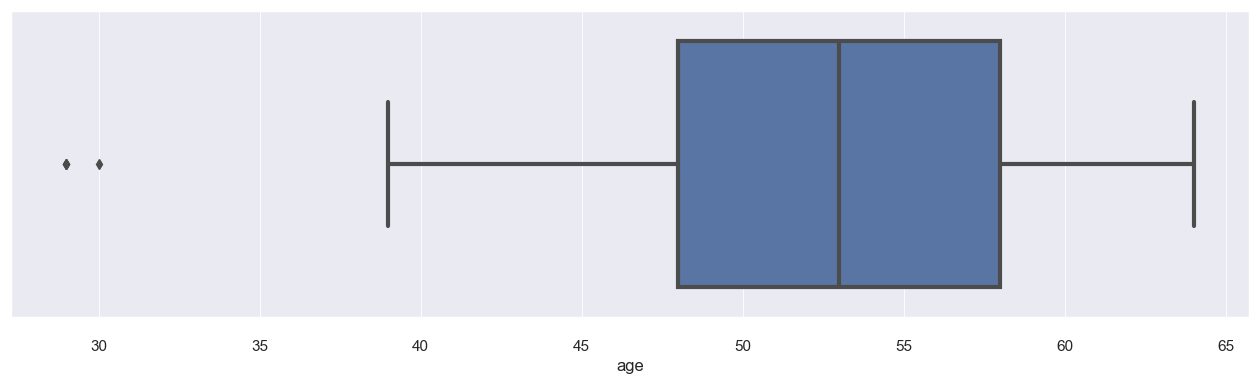

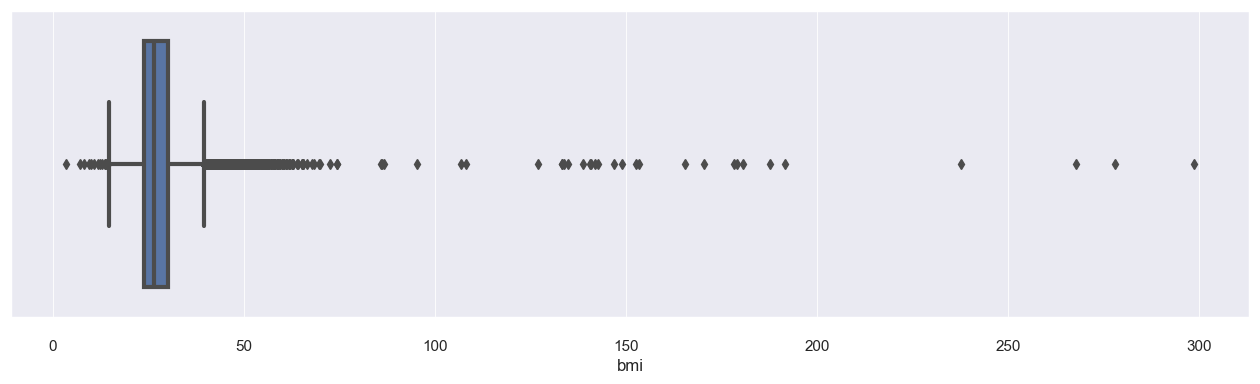

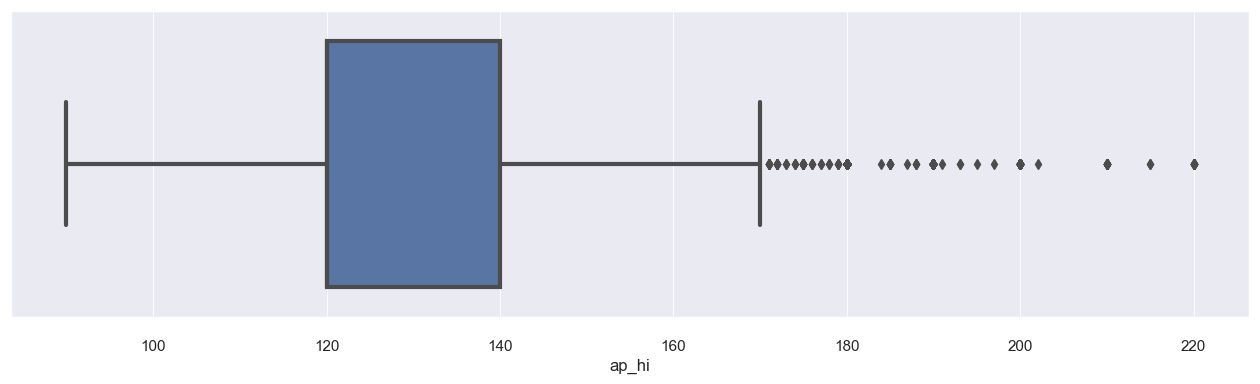

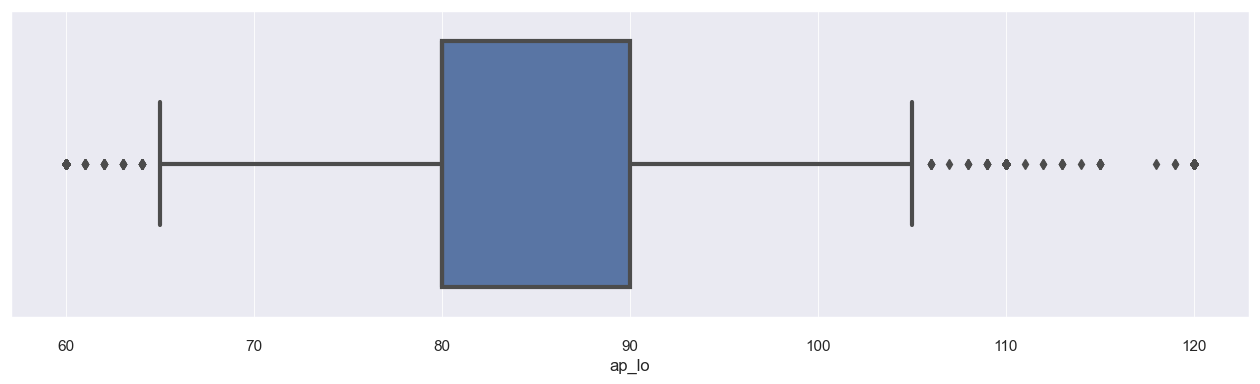

In [15]:
# Extract numerical attributes from the dataset
numeric_data = pd.DataFrame(cardio_data[num_attribs])

# Boxplot of the numeric data
for var in numeric_data:                                           # iterate over numerical attributes
  fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(16,4))       # setup the frame of the plot
  sb.boxplot(data=cardio_data, x=var, orient='h')                  # box plot

# Categorize Blood Pressure

Assign the 5 stages of the blood pressure category for the corresponding range from 1 to 5:

1. Normal 
2. Elevated
3. High blood pressure (hypertension) Stage 1 
4. High blood pressure (hypertension) Stage 2
5. Hypertensive crisis (consult your doctor immediately)

In [16]:
# Rank Systolic blood pressure
cardio_data.loc[ap_hi < 120, 'ap_hi'] = 1
cardio_data.loc[(ap_hi >= 120) & (ap_hi < 130), 'ap_hi'] = 2
cardio_data.loc[(ap_hi >= 130) & (ap_hi < 140), 'ap_hi'] = 3
cardio_data.loc[(ap_hi >= 140) & (ap_hi <= 180), 'ap_hi'] = 4
cardio_data.loc[ap_hi > 180, 'ap_hi'] = 5

# Rank Diastolic blood pressure
cardio_data.loc[ap_lo < 80, 'ap_lo'] = 1
cardio_data.loc[(ap_lo >= 80) & (ap_lo < 90), 'ap_lo'] = 3
cardio_data.loc[(ap_lo >= 90) & (ap_lo <= 120), 'ap_lo'] = 4
cardio_data.loc[ap_lo > 120, 'ap_lo'] = 5

The ranked blood pressure (bp) will be a new column, 'ap_hi' and 'ap_lo' will be dropped.

In [17]:
# Rank blood pressure and append it to the dataframe
bp = pd.DataFrame(cardio_data[['ap_hi', 'ap_lo']])
cardio_data['bp'] = bp.max(axis=1).astype('category')

# Drop ap_hi, ap_lo columns
cardio_data = cardio_data.drop(columns=['ap_hi', 'ap_lo'])

# Update categorical and numerical attributes
cat_attribs = ['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'bp', 'cardio']
num_attribs = ['age', 'bmi']

In [18]:
cardio_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68452 entries, 0 to 69999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   age          68452 non-null  float64 
 1   gender       68452 non-null  category
 2   cholesterol  68452 non-null  category
 3   gluc         68452 non-null  category
 4   smoke        68452 non-null  category
 5   alco         68452 non-null  category
 6   active       68452 non-null  category
 7   cardio       68452 non-null  category
 8   bmi          68452 non-null  float64 
 9   bp           68452 non-null  category
dtypes: category(8), float64(2)
memory usage: 2.1 MB


# Univariate Analysis

Visualize the summary of uni-variate distributions of each numerical attribute using boxplot, hisplot and violinplot

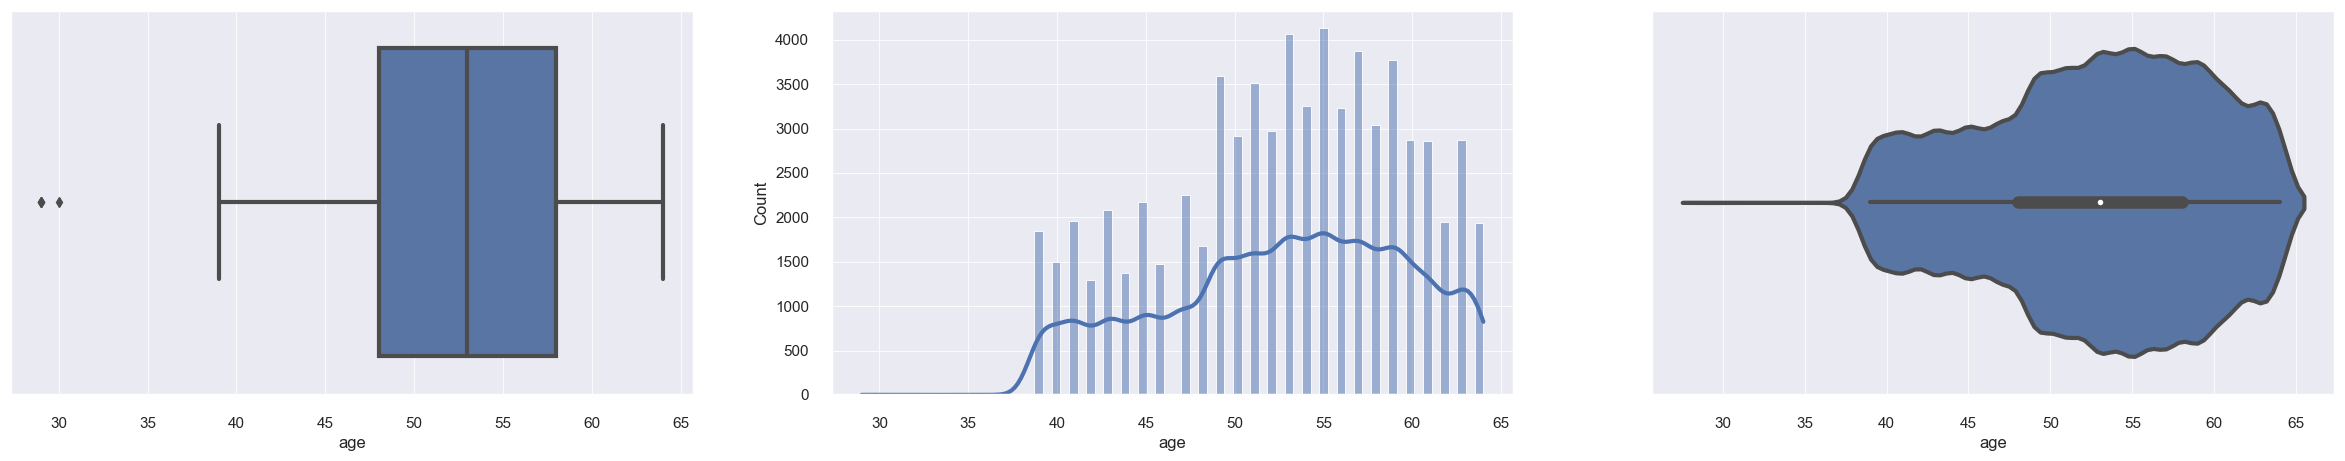

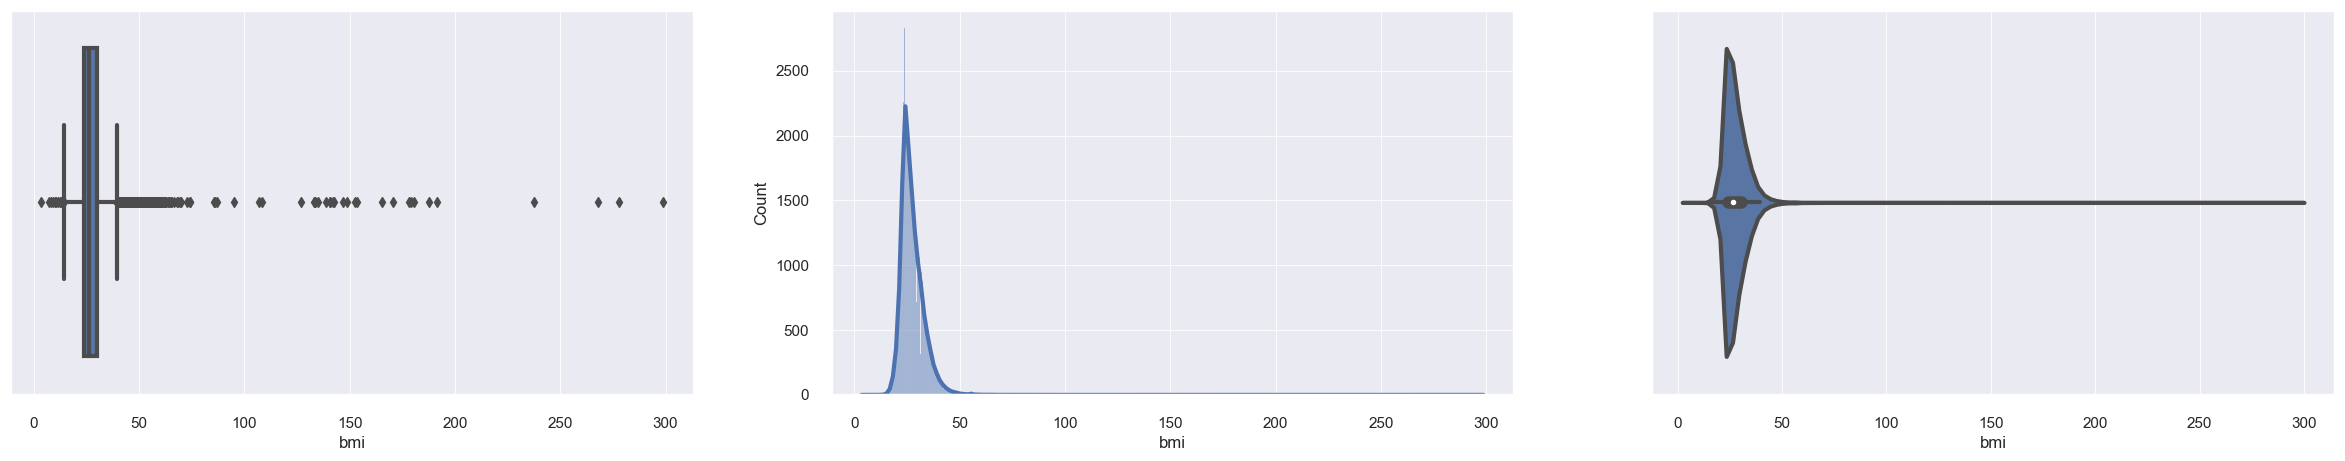

In [19]:
# Univariate analysis
for num_attrib in num_attribs:                                          # iterate over numerical attributes
  fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(30,5))            # setup the frame of the plot
  sb.boxplot(data=cardio_data, x=num_attrib, orient='h', ax=axes[0])    # box plot
  sb.histplot(data=cardio_data[num_attrib], kde=True, ax=axes[1])       # histogram with Kernel Density Estimators (KDE)
  sb.violinplot(data=cardio_data, x=num_attrib, orient='h', ax=axes[2]) # violin plot

The majority of patients whose information was provided in the dataset are:

- Between the ages of 39 and 64 years old
- Between a BMI range of 23 to 30 

For the purpose of learning, we will intentionally keep the outliers in BMI and see how they will affect the model.

# Categorical Attributes 

Use catplot to visualize the distribution of each categorical attribution.

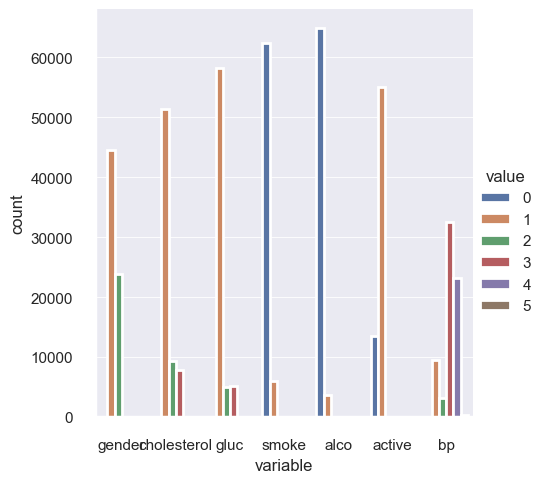

In [20]:
# Presence and absence of CVDs over each categorical attribute
cat_df = pd.melt(cardio_data, value_vars=cat_attribs[:-1])             # dataframe of categorical attributes
sb.catplot(x='variable', hue='value', data=cat_df, kind='count')       # categorical plot

According to the dataset, it seems like the majority of people:

- Have normal cholesterol and glucose level
- Neither smoke nor drink alcohol
- Regularly do physical activities

The target variable cardio has a balanced between positive and negative examples. The ratio of female to male 1.8 is to 1.

# Exploratory Analysis 


We have looked into the data generally and cleaned it to make it easier to understand. Next we will be exploring further into the Cardiovascular Disease Datasheet.

In [37]:
ppreport = pp.ProfileReport(cardio_data).to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

# Bivariate Analysis

Lets look at some numerical attributes

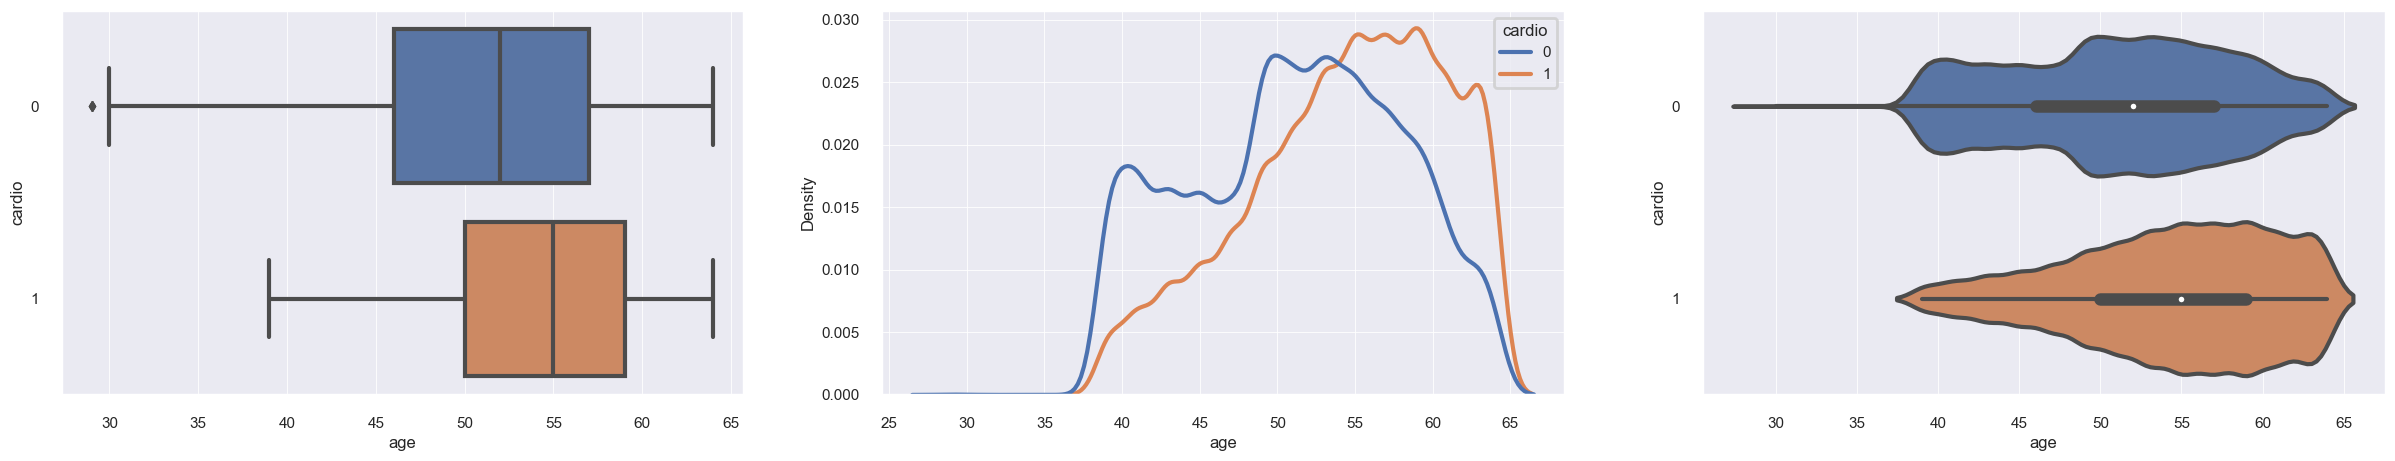

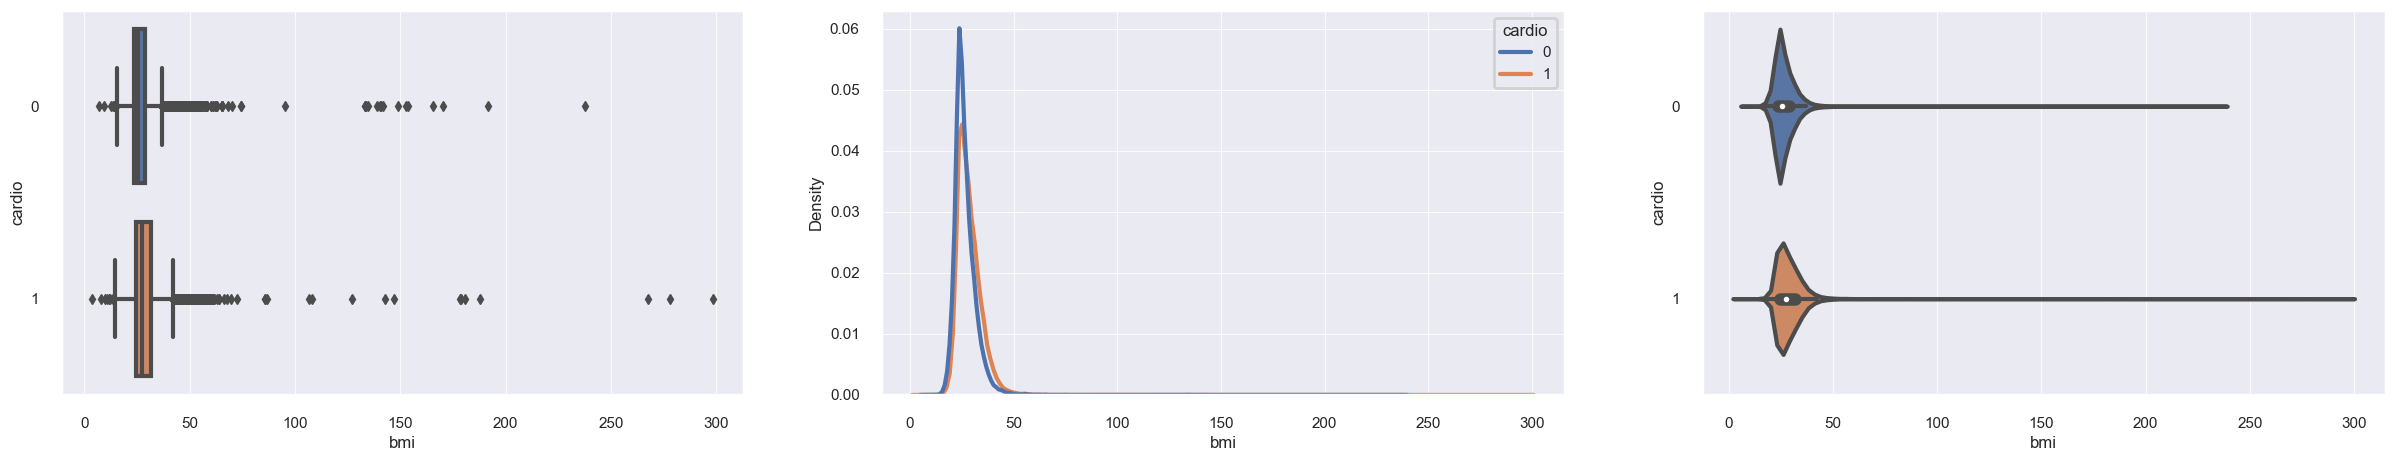

In [22]:
# Bivariate analysis with respect to target class
for num_attrib in num_attribs:                                                           # iterate over numerical attributes
  fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(30,5))                             # setup the frame of the plot
  sb.boxplot(data=cardio_data, x=num_attrib, y='cardio', orient='horizontal', ax=axes[0])     # box plot
  sb.kdeplot(data=cardio_data, x=num_attrib, hue='cardio', ax=axes[1])                        # kde plot
  sb.violinplot(data=cardio_data, x=num_attrib, y='cardio', orient='horizontal', ax=axes[2])  # violin plot

From the graphs above, it can be seen that age, systolic blood pressure(ap_hi), diastolic blood pressure(ap_low) has a noticable difference between those who have CVD and those who does not. Wehreases, BMI has almost overlapping distributions. 

This means that age, systolic blood pressure(ap_hi), diastolic blood pressure(ap_low) might be a good factor to distinguish between CVD and non-CVD patients while BMI is not important in predicting this target class.


Let's take a look at how age spreads along the target class.

<AxesSubplot:xlabel='age', ylabel='count'>

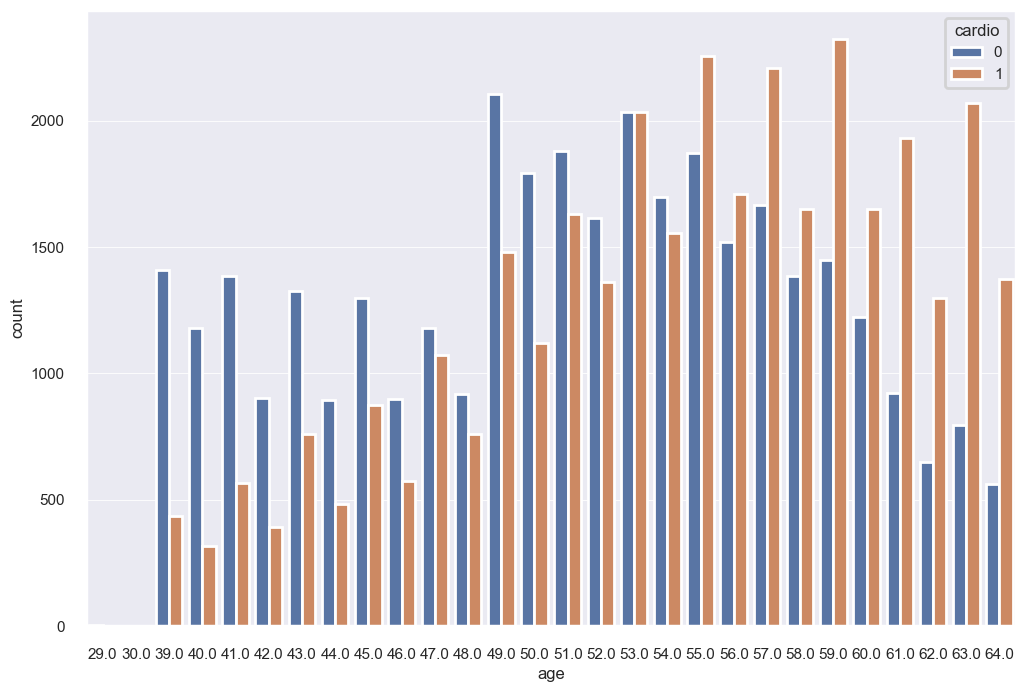

In [23]:
# Count plot of age over target class
fig = plt.subplots(figsize=(12,8))                     # setup the frame of the plot
sb.countplot(x='age', hue='cardio', data=cardio_data)  # count plot

From the graph above, we can observe that after the age 55, patients are more exposed to CVD.

<AxesSubplot:xlabel='bp', ylabel='count'>

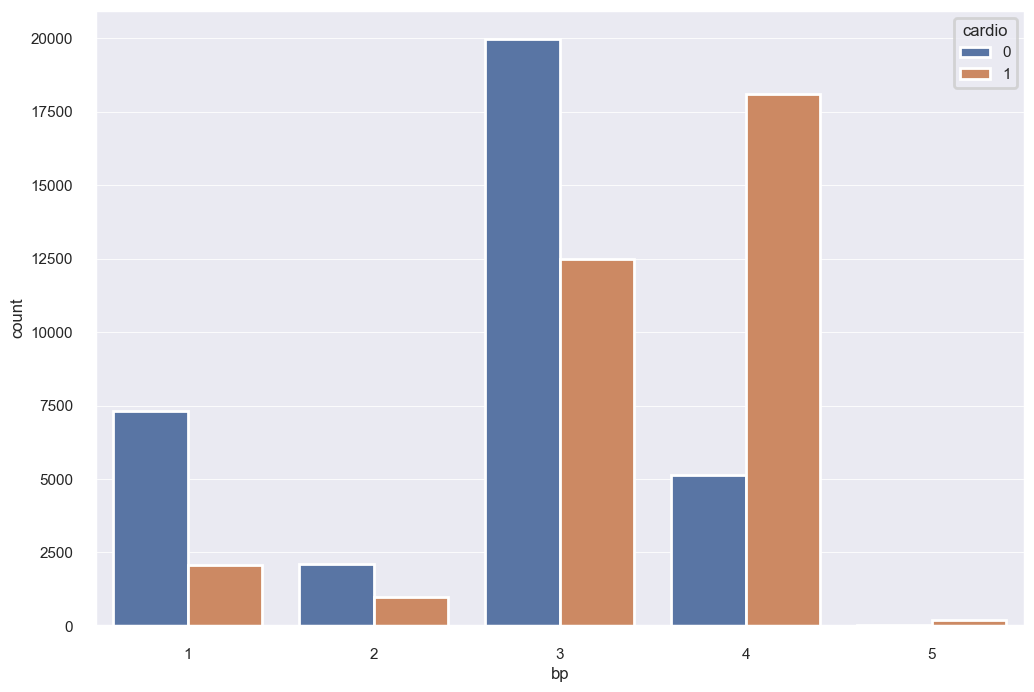

In [24]:
# Count plot of age over target class
fig = plt.subplots(figsize=(12,8))                     # setup the frame of the plot
sb.countplot(x='bp', hue='cardio', data=cardio_data)  # count plot

From the graph above, we can see that patients with blood pressure (bp) of category 3 and 4 are more exposed to CVD which are the ones with high blood pressure stage 1 and 2. 

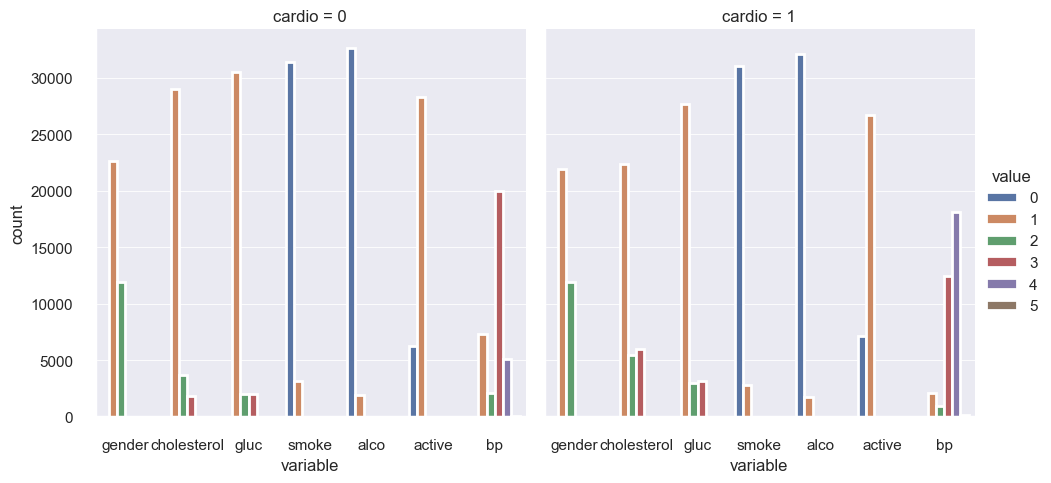

In [26]:
# Presence and absence of CVDs over each categorical attribute
cat_df = pd.melt(cardio_data, id_vars=['cardio'], value_vars=cat_attribs[:-1])       # dataframe of categorical attributes
sb.catplot(x='variable', hue='value', col='cardio', data=cat_df, kind='count')  # categorical plot

From the grpah above, it can be seen that patients with CVD have higher cholestrol, glucose and blood pressure.

An alternative way of analysis is by doing heatmap as shown below.

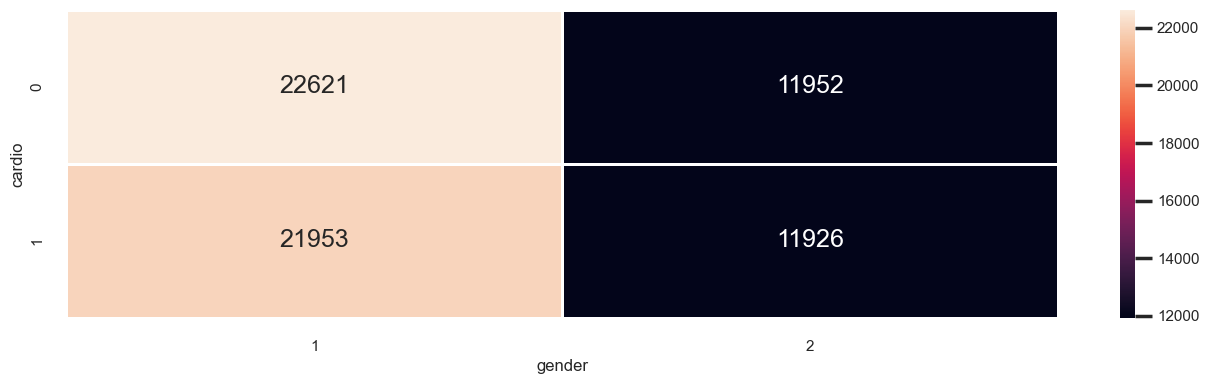

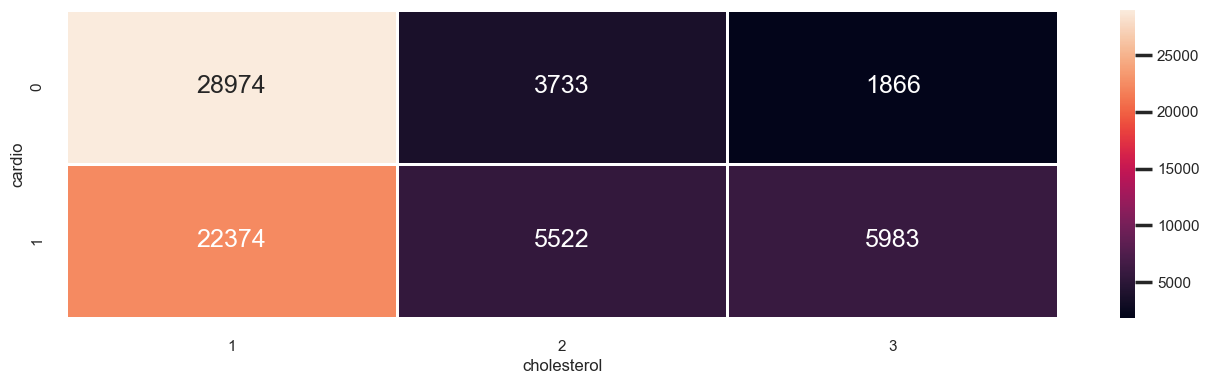

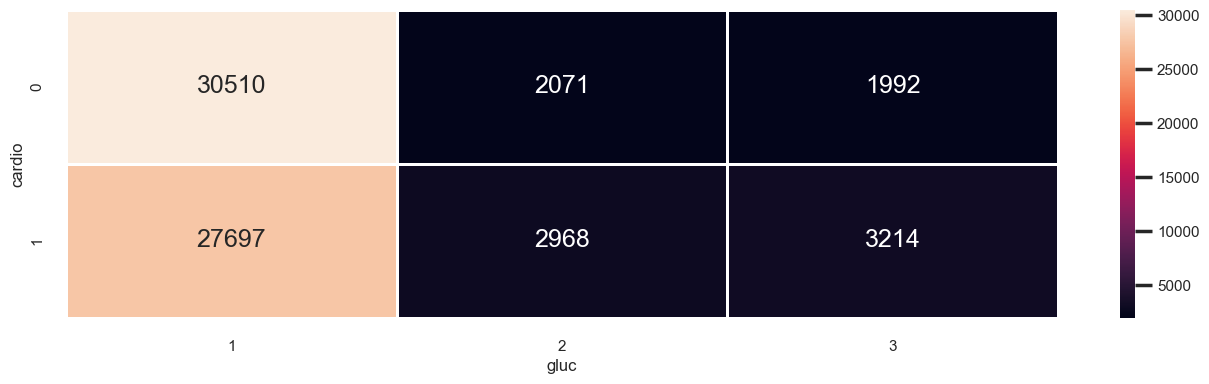

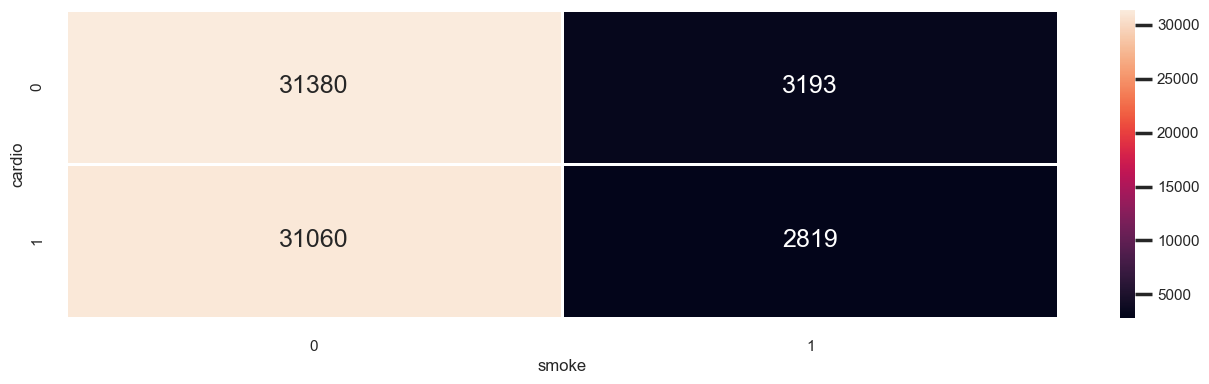

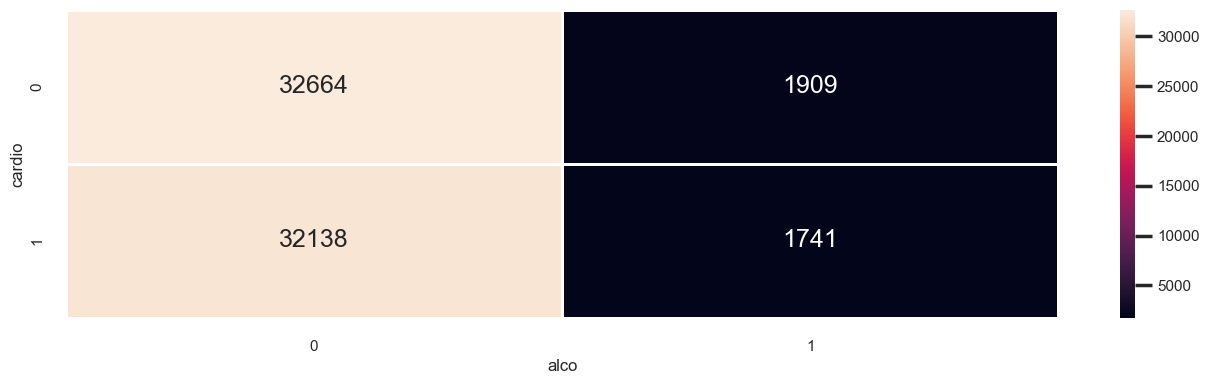

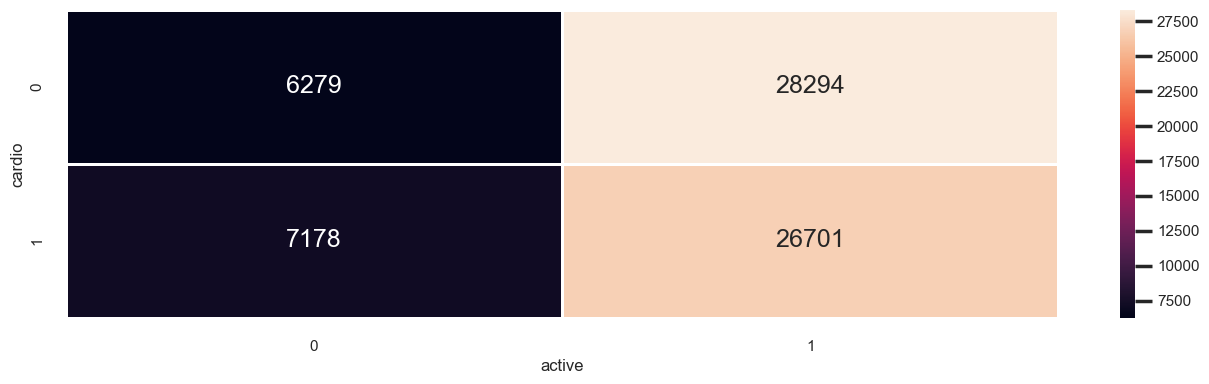

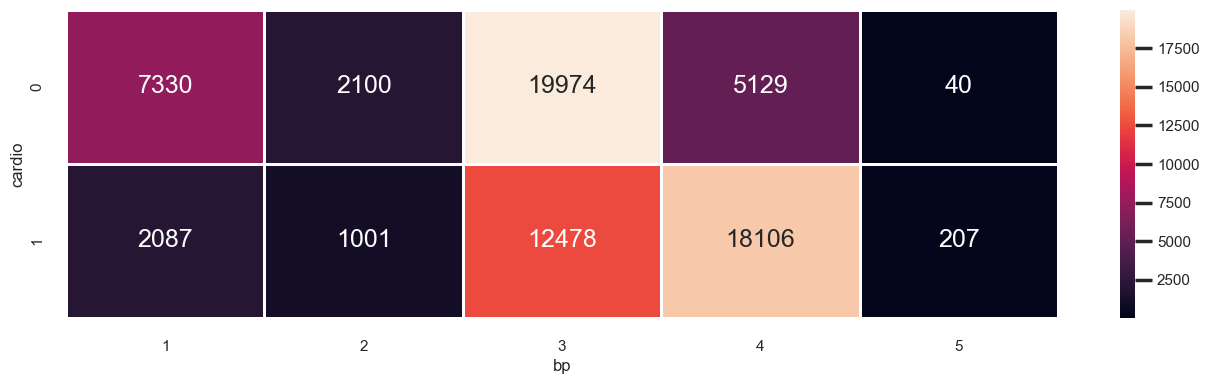

In [28]:
# The relationship between the presence and absence of CVDs and categorical attributes
for cat_attrib in cat_attribs[:-1]:                                       # iterate over categorical attributes
  fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(16,4))              # setup the frame of the plot
  sb.heatmap(cardio_data.groupby(['cardio', cat_attrib]).size().unstack(),
             linewidths=1, annot=True, annot_kws={'size': 18}, fmt='.0f') # heat map

The ratio of patients with CVD to those without is:

- Approximately 1/1 for both genders
- Slightly smaller than 1 among patients with normal cholesterol and/or glucose levels but noticable among patients with above and well above normal levels
- Approximately the same for both smokers and non-smokers
- Approximately the same for both patients who drink alcohol and who don't
- Approximately the same for both active and inactive patients
- Significant for each level of blood pressure:
   - Normal: 1/3
   - Elevated: 1/2
   - High blood pressure Stage 1: 2/3
   - High blood pressure Stage 2: 7/2
   - Hypertensive crisis: 5/1 

# Correlations

Let us take a look at the correlation matrix.

C:\Users\User\AppData\Local\Temp\ipykernel_29976\4251273015.py:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


<AxesSubplot:>

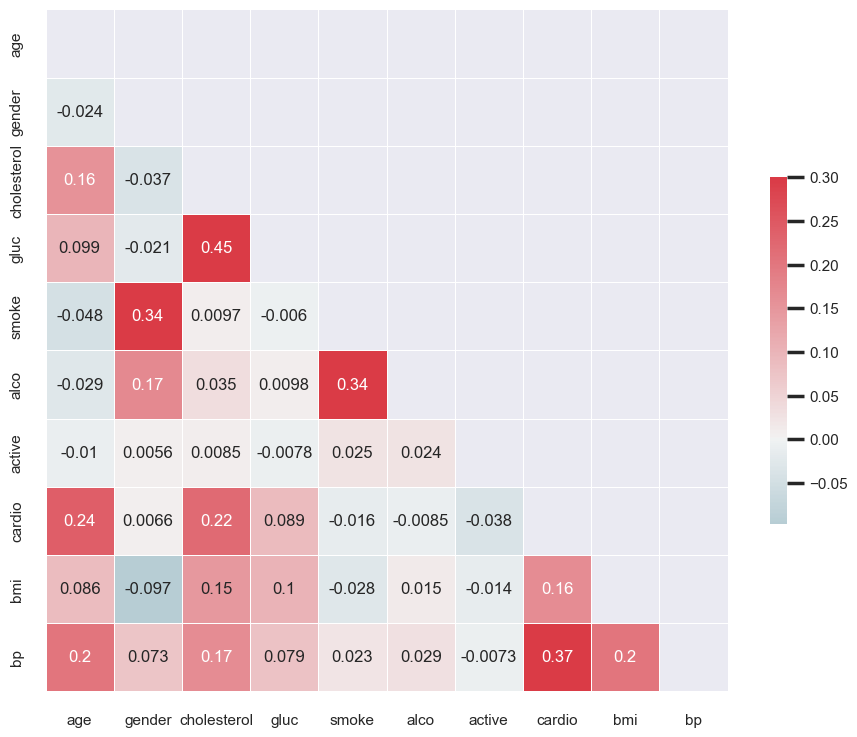

In [29]:
# Calculate the correlations between attributes
corr = cardio_data.astype('float').corr()
cmap = sb.diverging_palette(220, 10, as_cmap=True)

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
fig, axes = plt.subplots(figsize=(11,9))

# Draw the heatmap with the mask and correct aspect ratio
sb.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, annot=True,
           square=True, linewidths=.5, cbar_kws={"shrink": .5})

From this table, it seems like blood pressure (bp) has the highest correlation to determine if the patient has or doesn not has CVD. This is followed by age, cholestrol and weight.